In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# formatting stuff:
title_font_dict = {'weight': 'bold', 'size': 18}
axis_font_dict = {'weight': 'bold', 'size': 15}
legend_font_dict = {'weight': 'bold', 'size': 12}

color_dict = {
    'NO-IMM': 'gray',
    'VACCINE': 'red',
    'T-VACCINE': 'green',
    'REPNOISE': 'blue',
    'TAR': 'purple',
    'CB': 'cyan',
    'BOOSTER': 'black',
    'ET': 'orange'
}

baselindes_ids = {
    'VACCINE': 'jz2nau55',
    'T-VACCINE': '00h1ta01',
    'REPNOISE': 'u4k9xxpw',
    'TAR': '9pxkem5t',
    'CB': 'lj96ws11',
    'BOOSTER': 'kx0cf3hh',
    'NO-IMM': '4f819rig'

}


In [7]:
runs = api.runs("low_cost_toxification")  # Replace with your entity and project name

# Toxicity:

In [8]:
et_dfs = {}
init_toxs = []
for run in runs:
  # if 'TESTING' in run.name and len(run.name.split('_'))<=2:
  if 'et_hard' in run.name:
    df = run.history(samples=run.lastHistoryStep + 1, pandas=True)
    df['IMMUNIZING_LAYER'].ffill(inplace=True)
    df['layer'] = df['IMMUNIZING_LAYER']
    init_tox = run.summary['INITIAL_TOXICITY'] + 1e-10
    init_toxs.append(init_tox)
    df['Toxicity after attacks'] = df['Toxicity after attacks'] * init_tox
    df['Toxicity after succesful attacks'] = df['Toxicity after succesful attacks'] * init_tox
    df = df[
        df['Toxicity after attacks'].notna() |
        df['Toxicity after succesful attacks'].notna()
    ]
    df = df.groupby(['layer','STEP']).agg({
        'Toxicity after attacks': 'mean',
        'Toxicity after succesful attacks': 'mean'
    })
    df = df.groupby('layer').agg({
        'Toxicity after attacks': 'mean',
        'Toxicity after succesful attacks': lambda x: x.notna().sum() / 4
    }).reset_index()
    df.columns= ['layer', 'attack toxicity', 'ASR']
    et_dfs[run.name] = df


all_runs_df = pd.concat(list(et_dfs.values()))

et_df = all_runs_df.groupby('layer').agg({
    'attack toxicity': 'mean',
    'ASR': 'mean'
}).reset_index()
et_mean_init_tox = sum(init_toxs)/len(init_toxs)

print(et_dfs.keys())

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [9]:
baselines_dfs = {}
init_toxs = {}

for baseline_name, baseline_id in baselindes_ids.items():
  candidate_run = api.run(f"jfcevallos/low_cost_toxification/{baseline_id}")
  candidate_df = candidate_run.history(samples=candidate_run.lastHistoryStep + 1, pandas=True)
  init_toxs[baseline_name] = candidate_run.summary['INITIAL_TOXICITY']
  init_tox = init_toxs[baseline_name] + 1e-10

  candidate_df['IMMUNIZING_LAYER'].ffill(inplace=True)
  candidate_df['layer'] = candidate_df['IMMUNIZING_LAYER']
  candidate_df['Toxicity after attacks'] = candidate_df['Toxicity after attacks'] * init_tox
  candidate_df['Toxicity after succesful attacks'] = candidate_df['Toxicity after succesful attacks'] * init_tox
  candidate_df = candidate_df[
      candidate_df['Toxicity after attacks'].notna() |
      candidate_df['Toxicity after succesful attacks'].notna()
  ]
  candidate_df = candidate_df.groupby(['layer','STEP']).agg({
      'Toxicity after attacks': 'mean',
      'Toxicity after succesful attacks': 'mean'
  })

  candidate_df = candidate_df.groupby('layer').agg({
      'Toxicity after attacks': 'mean',
      'Toxicity after succesful attacks': lambda x: x.notna().sum() / 4
  }).reset_index()
  candidate_df.columns= ['layer', 'attack toxicity', 'ASR']

  baselines_dfs[baseline_name] = candidate_df

init_toxs['ET'] = et_mean_init_tox

True
True
True
True
True
True
True


ValueError: The number of FixedLocator locations (19), usually from a call to set_ticks, does not match the number of labels (32).

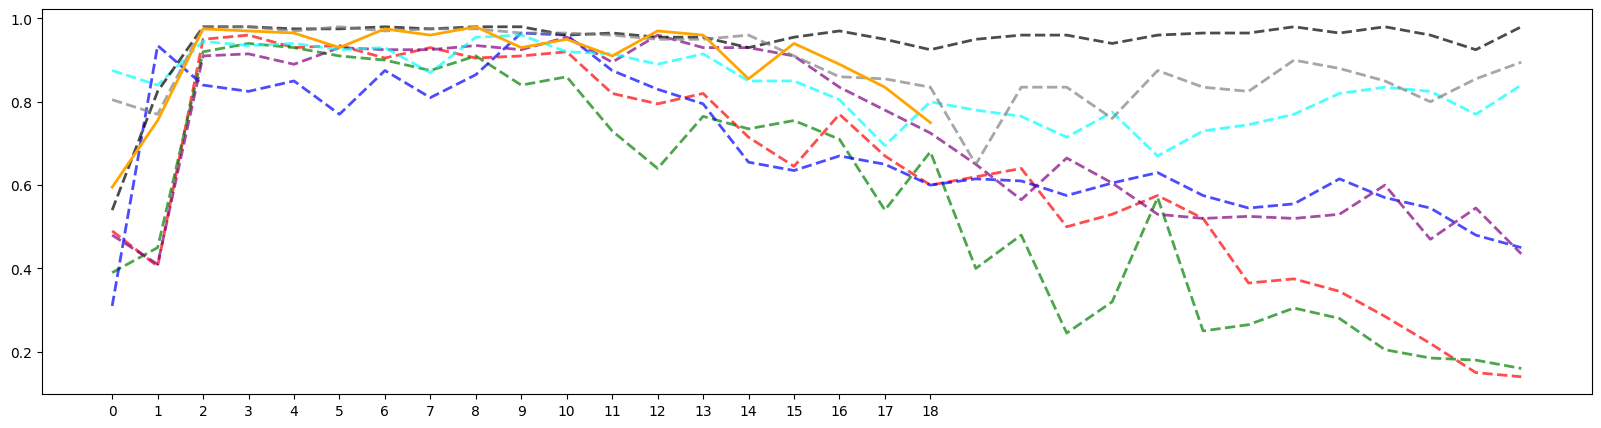

In [10]:
fig, ax = plt.subplots(figsize=(20, 5))



for i, (candidate_name, candidate_df) in enumerate(baselines_dfs.items(), start=1):


  # Mean performance after attacks: (Baseline track)
  ax.plot(
      candidate_df['layer'],
      candidate_df['attack toxicity'],
      linestyle='--',
      linewidth=2,
      color=color_dict[candidate_name],
      alpha=0.7,
      label=candidate_name)


# Mean performance after attacks: (Baseline track)
ax.plot(
    et_df['layer'],
    et_df['attack toxicity'],
    linestyle='-',
    color=color_dict['ET'],
    alpha=1,
    linewidth=2,
    label='ET')


# Customize ticks
ax.set_xticks(ticks=et_df['layer'], labels=list(range(32)), fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
ax.set_xlabel('Layer', fontdict=axis_font_dict)
ax.set_ylabel('Toxicity', fontdict=axis_font_dict)
ax.set_yticklabels(ax.get_yticks().round(2), fontdict={'fontsize': 12, 'fontweight': 'bold'})


# Combine legends from both axes
lines1, labels1 = ax.get_legend_handles_labels()

ax.legend(lines1,labels1,
          prop=legend_font_dict,
          ncols=2,
          loc='upper right')


plt.title(f'Toxicity after Layer-wise ITI-attacks', fontdict=title_font_dict)

plt.show()

# First plot:

In [ ]:


# constants:
min_relative_attack_perf = 0.5

# read and clean data:
omni = pd.read_csv('results/performance_results_full_layer_immunization.csv')

columns_to_drop = [col for col in omni.columns if col.endswith('MIN') \
                       or col.endswith('MAX') \
                       or col.endswith('step')]
omni.drop(columns=columns_to_drop, inplace=True)
omni.set_index('STEP', inplace=True)


# prepare basline data:
baseline_seed = 1
columns_to_drop = [col for col in omni.columns if not f'BASELINE_{baseline_seed}' in col]
baseline_ds = omni.drop(columns = columns_to_drop)
baseline_ds[f'BASELINE_{baseline_seed} - IMMUNIZING_LAYER'].ffill(inplace=True)
baseline_ds = baseline_ds.drop(columns = [f'BASELINE_{baseline_seed} - Performance after succesful attacks',  # Notice we keep unsuccesful attack, to give a more "fair" look to the baseline
                                          f'BASELINE_{baseline_seed} - Succesfully immunized layers',
                                          f'BASELINE_{baseline_seed} - Unsuccesfully immunized layers'])

baseline_ds.columns = ['layer', 'attack performance']
baseline_ds = baseline_ds.groupby('layer').max().reset_index()
baseline_ds.columns = ['layer', 'mean baseline attack performance']
baseline_ds.fillna(min_relative_attack_perf, inplace=True)

In [ ]:
run_names = list(set([col.split(' -')[0] for col in omni.columns if 'VACCINE' in col]))

run_dss = []

for run_to_analyze in run_names:

    columns_to_drop = [col for col in omni.columns if not col.split(' -')[0] == run_to_analyze]
    run_ds = omni.drop(columns=columns_to_drop)
    run_ds['action'] = run_ds[run_to_analyze + ' - Performance after attacks'].notna().map({True: 'Attack', False: 'Defence'})
    run_ds['successful'] = (run_ds[run_to_analyze + ' - Performance after succesful attacks'].notna() \
     | run_ds[run_to_analyze + ' - Performance after succesful defences'].notna())
    run_ds['absortion'] = run_ds[run_to_analyze + ' - Absorbed defences at layer'].notna()
    columns_to_drop = [col for col in run_ds.columns if 'after succesful' in col or 'Absorbed' in col]
    run_ds = run_ds.drop(columns=columns_to_drop)
    run_ds.columns = ['layer',
           'attack performance',
           'defence performance',
           'immunized',
           'not immunized',
           'action',
           'successful',
           'absortion']
    """
    # correction for the stepfix
    active_step_flag = (run_ds['defence performance'].notna()) | (run_ds['attack performance'].notna())
    run_ds = run_ds.loc[active_step_flag]
    baseline_ds = baseline_ds.loc[active_step_flag]
    """
    # Locate the non-NaN positions in the curr dataframe
    non_nan_indices = run_ds['layer'].dropna().index
    run_ds['mean baseline attack performance'] = float('nan')
    run_ds.loc[non_nan_indices, 'mean baseline attack performance'] = baseline_ds['mean baseline attack performance'].values

    # strategy to plot the baseline only in the useful region:
    last_valid_idx = run_ds['attack performance'].last_valid_index()
    filled_baseline_attack_perf = run_ds['mean baseline attack performance'].ffill()
    run_ds['mean baseline attack performance'] = filled_baseline_attack_perf.where(run_ds.index <= last_valid_idx)

    # strategies for aggregation
    run_ds['successful'] = run_ds['successful'].astype(int)
    run_ds['absortion'] = run_ds['absortion'].astype(int)
    run_ds.drop(columns=['not immunized'], inplace=True)
    run_ds['layer'].ffill(inplace=True)
    run_ds['immunized'] = run_ds['immunized'].notna().map({True : 1, False:0 })
    run_dss.append(run_ds)

# all runs dataframe:
total_ds = pd.concat(run_dss)

# all defences dataframe:
defence_ds = total_ds.loc[(total_ds['action']=='Defence') | total_ds['immunized'] == 1].copy().drop(columns=[
    'attack performance',
    'action',
    'mean baseline attack performance'])

defence_ds = defence_ds[defence_ds['layer'].notna()].copy()  # the first record is associated with init value retrieval... it is not a defence really...
defence_performance_ds = defence_ds[['layer','defence performance', 'absortion', 'immunized']]

# extract values for plotting:
grouped_defence_performance = defence_performance_ds.groupby('layer').agg({
    'defence performance': 'mean',
    'absortion': ['count','sum'],
    'immunized': ['sum']
    })
grouped_defence_performance.columns = [' '.join(col).strip() for col in grouped_defence_performance.columns.values]
grouped_defence_performance['Defence success ratio'] = grouped_defence_performance['absortion sum'] / grouped_defence_performance['absortion count']
grouped_defence_performance['Immunization ratio'] = grouped_defence_performance['immunized sum'] / len(run_dss)
grouped_defence_performance = grouped_defence_performance[['defence performance mean', 'Defence success ratio', 'Immunization ratio']]
grouped_defence_performance.columns = ['Mean performance after defence', 'Defence success ratio','Immunization ratio']
imm_track_attack_perf = total_ds[total_ds['action']=='Attack'][['layer', 'attack performance']].groupby('layer').mean()

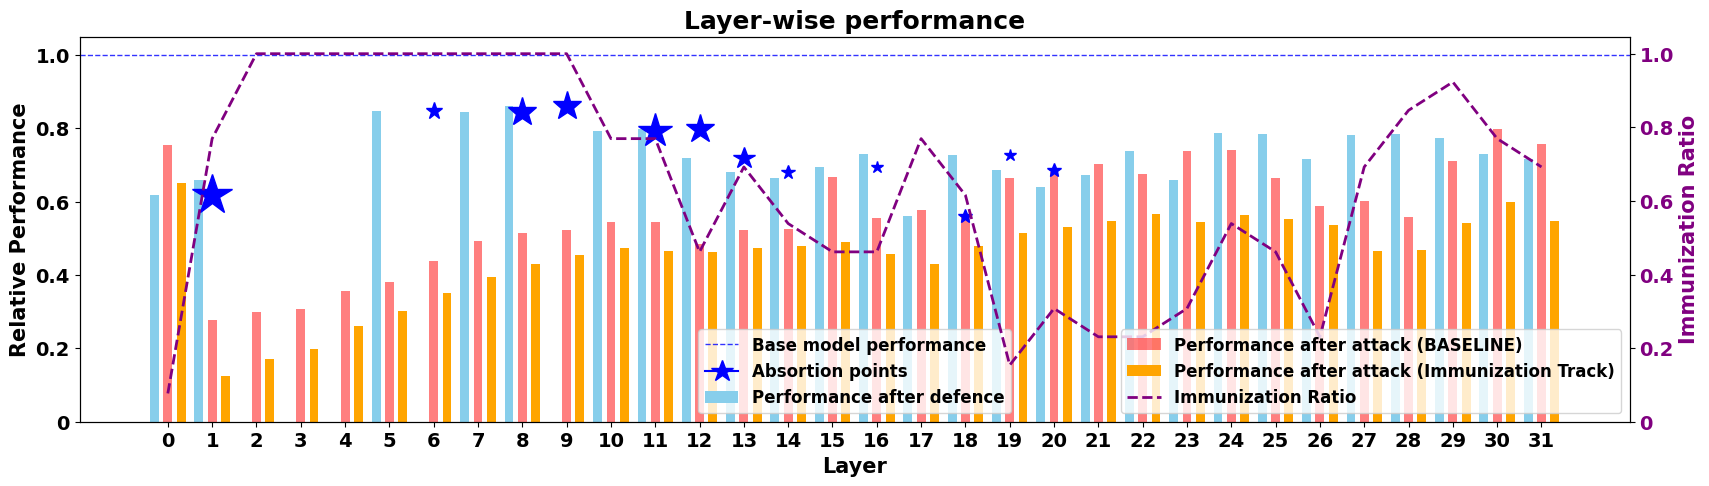

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))

# Reference performance:
ax.axhline(y=1,
            color='blue',
            alpha=0.8,
            linestyle='dashed',
            linewidth=1.0,
            label='Base model performance')

# Bar plot stuff:
width = 0.2  # Width of each bar

# Mean performance after defence:
ax.bar(
    x=grouped_defence_performance.index - ((3*width)/2),
    height=grouped_defence_performance['Mean performance after defence'],
    width=width,
    linestyle='-',
    lw=2,
    color='skyblue',
    alpha=1,
    label='Performance after defence')


# Mean performance after attacks: (Baseline track)
ax.bar(
    x=baseline_ds['layer'],
    height=baseline_ds['mean baseline attack performance'],
    width=width,
    linestyle='-',
    lw=2,
    color='red',
    alpha=0.5,
    label='Performance after attack (BASELINE)')

# Mean performance after attacks: (Baseline track)
ax.bar(
    x=imm_track_attack_perf.index + ((3*width)/2),
    height=imm_track_attack_perf['attack performance'],
    width=width,
    linestyle='-',
    lw=2,
    color='orange',
    alpha=1,
    label='Performance after attack (Immunization Track)')


absortion_points = grouped_defence_performance.loc[grouped_defence_performance['Defence success ratio'] > 0]
# Absortion points:
for idx, layer in enumerate(
        absortion_points.index):
    absortion_ratio = absortion_points['Defence success ratio'].loc[layer]
    ax.plot(
            layer+1,
            absortion_points['Mean performance after defence'].loc[layer],
            marker='*',
            markersize= math.sqrt(absortion_points['Defence success ratio'].loc[layer])*60,
            color='blue',
            alpha=1,
            label=('Absortion points' if idx == len(absortion_points.index)//2 else None))

# Customize ticks
ax.set_xticks(ticks=grouped_defence_performance.index, labels=list(range(32)), fontsize=14, fontweight='bold')
ax.set_yticks(ticks=[0,0.2,0.4,0.6,0.8,1.0], labels=[0,0.2,0.4,0.6,0.8,1.0], fontsize=14, fontweight='bold')

ax.set_xlabel('Layer', fontdict=axis_font_dict)
ax.set_ylabel('Relative Performance', fontdict=axis_font_dict)


# Create secondary y-axis
ax2 = ax.twinx()
# which is for the immunization ratio
ax2.plot(grouped_defence_performance['Immunization ratio'], linestyle='--', lw=2, color='purple', label='Immunization Ratio')
# Customize ticks for the secondary y-axis
ax2.set_yticks(ticks=[0,0.2,0.4,0.6,0.8,1.0], labels=[0,0.2,0.4,0.6,0.8,1.0], fontsize=14, fontweight='bold', color='purple')

# Label for the secondary y-axis
ax2.set_ylabel('Immunization Ratio', color='purple', fontdict=axis_font_dict)

# Combine legends from both axes
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax.legend(lines1[:3],labels1[:3],
          prop=legend_font_dict,
           loc='lower center')

ax2.legend(lines1[3:] + lines2, labels1[3:] + labels2,
           prop=legend_font_dict,
           loc='lower right')

plt.title(f'Layer-wise performance', fontdict=title_font_dict)

plt.show()

# Baseline comparison:

In [ ]:

pre_attack_performances = {}


baselines_dfs = {}

for baseline_name, baseline_id in baselindes_ids.items():
  candidate_run = api.run(f"jfcevallos/low_cost_toxification/{baseline_id}")
  candidate_df = candidate_run.history(samples=candidate_run.lastHistoryStep + 1, pandas=True)
  candidate_df['IMMUNIZING_LAYER'].ffill(inplace=True)
  init_perf = candidate_run.summary['INITIAL_PERFORMANCE'] + 1e-10
  pre_attack_performances[baseline_name] = candidate_run.summary['INITIAL_PERFORMANCE']
  candidate_df['Performance after attacks'] = candidate_df['Performance after attacks'] * init_perf
  candidate_df = candidate_df[candidate_df['Performance after attacks'].notna()]
  candidate_df = candidate_df[['IMMUNIZING_LAYER','Performance after attacks']].copy()
  candidate_df.columns = ['layer', 'mean attack performance']
  candidate_df = candidate_df.groupby(['layer']).agg({
        'mean attack performance': 'mean',
    }).reset_index()
  baselines_dfs[baseline_name] = candidate_df

True
True
True
True
True
True
True


In [ ]:
et_dfs = {}
init_perfs = []
for run in runs:


  # if 'TESTING' in run.name and len(run.name.split('_'))<=2:
  if 'super_ettv' in run.name:
    df = run.history(samples=run.lastHistoryStep + 1, pandas=True)
    df['IMMUNIZING_LAYER'].ffill(inplace=True)
    df['layer'] = df['IMMUNIZING_LAYER']
    init_perf = run.summary['INITIAL_PERFORMANCE'] + 1e-10
    init_perfs.append(init_perf)
    df['Performance after attacks'] = df['Performance after attacks'] * init_perf
    df['Performance after succesful attacks'] = df['Performance after succesful attacks'] * init_perf
    df = df[df['Performance after attacks'].notna()]
    df = df.groupby('layer').agg({
        'Performance after attacks': 'mean',
    }).reset_index()

    df.columns= ['layer', 'mean attack performance']
    et_dfs[run.name] = df


all_runs_df = pd.concat(list(et_dfs.values()))

et_df = all_runs_df.groupby('layer').agg({
    'mean attack performance': 'mean',
}).reset_index()

pre_attack_performances['ET'] = sum(init_perfs) / len(init_perfs)

print(et_dfs.keys())

<ipython-input-15-04154bb11323>:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks().round(2), fontdict={'fontsize': 12, 'fontweight': 'bold'})


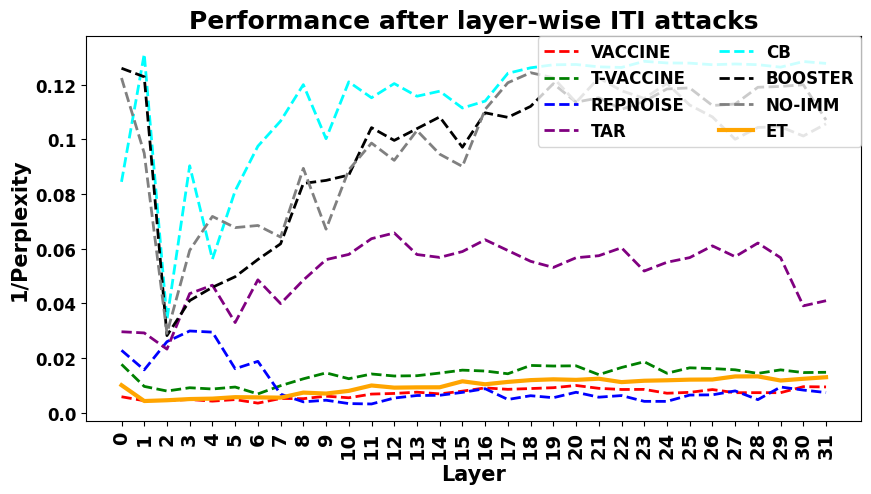

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

for i, (candidate_name, candidate_df) in enumerate(baselines_dfs.items(), start=1):


  # Mean performance after attacks: (Baseline track)
  ax.plot(
      candidate_df['layer'],
      candidate_df['mean attack performance'],
      linestyle='--',
      color=color_dict[candidate_name],
      alpha=1,
      linewidth=2,
      label=candidate_name)

# Mean performance after attacks: (Baseline track)
ax.plot(
    et_df['layer'],
    et_df['mean attack performance'],
    linestyle='-',
    color=color_dict['ET'],
    alpha=1,
    linewidth=3,
    label='ET')


# Customize ticks
ax.set_xticks(ticks=et_df['layer'], labels=list(range(32)), fontsize=14, fontweight='bold')
plt.xticks(rotation=90)  # Rotate x-ticks by 45 degrees
ax.set_xlabel('Layer', fontdict=axis_font_dict)
ax.set_ylabel('1/Perplexity', fontdict=axis_font_dict)


# Combine legends from both axes
lines1, labels1 = ax.get_legend_handles_labels()

ax.legend(lines1,labels1,
          prop=legend_font_dict,
          ncol=2,
          borderaxespad=0,
          loc='upper right')

# ax.set_yscale('log')
ax.set_yticklabels(ax.get_yticks().round(2), fontdict={'fontsize': 12, 'fontweight': 'bold'})

plt.title(f'Performance after layer-wise ITI attacks', fontdict=title_font_dict)

plt.show()

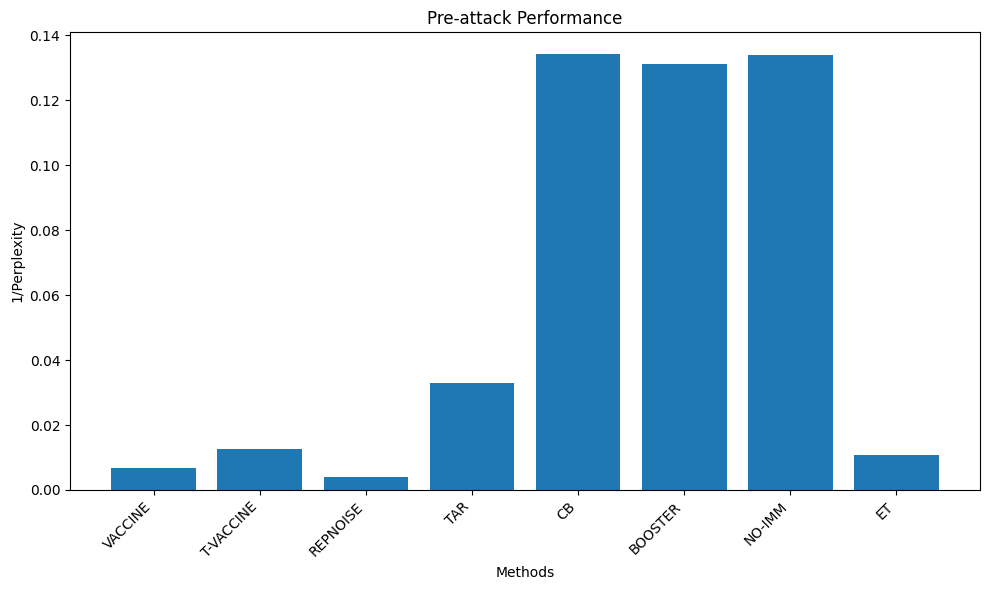

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(pre_attack_performances.keys(), pre_attack_performances.values())
plt.xlabel("Methods")
plt.ylabel("1/Perplexity")
plt.title("Pre-attack Performance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# first plot selective immunization:

In [ ]:
# formatting stuff:
title_font_dict = {'weight': 'bold', 'size': 18}
axis_font_dict = {'weight': 'bold', 'size': 15}
legend_font_dict = {'weight': 'bold', 'size': 12}

# constants:
min_relative_attack_perf = 0.5

# read and clean data:
omni = pd.read_csv('results/performance_results.csv')

columns_to_drop = [col for col in omni.columns if col.endswith('MIN') \
                       or col.endswith('MAX') \
                       or col.endswith('step')]
omni.drop(columns=columns_to_drop, inplace=True)
omni.set_index('STEP', inplace=True)


# prepare basline data:
baseline_seed = 2
columns_to_drop = [col for col in omni.columns if not f'BASELINE_{baseline_seed}' in col]
baseline_ds = omni.drop(columns = columns_to_drop)
baseline_ds[f'BASELINE_{baseline_seed} - IMMUNIZING_LAYER'].ffill(inplace=True)
baseline_ds = baseline_ds.drop(columns = [f'BASELINE_{baseline_seed} - Performance after succesful attacks',  # Notice we keep unsuccesful attack, to give a more "fair" look to the basline
                                          f'BASELINE_{baseline_seed} - Succesfully immunized layers',
                                          f'BASELINE_{baseline_seed} - Unsuccesfully immunized layers'])
baseline_ds.columns = ['layer', 'attack performance']
baseline_ds = baseline_ds.groupby('layer').max().reset_index()
baseline_ds.columns = ['layer', 'mean baseline attack performance']
baseline_ds.fillna(min_relative_attack_perf, inplace=True)

In [ ]:
run_names = list(set([col.split(' -')[0] for col in omni.columns if 'VACCINE' in col]))

run_dss = []

for run_to_analyze in run_names:

    if 'sl' not in run_to_analyze:
        continue

    columns_to_drop = [col for col in omni.columns if not col.split(' -')[0] == run_to_analyze]
    run_ds = omni.drop(columns=columns_to_drop)
    run_ds['action'] = run_ds[run_to_analyze + ' - Performance after attacks'].notna().map({True: 'Attack', False: 'Defence'})
    run_ds['successful'] = float('nan')
    if run_to_analyze + ' - Performance after succesful attacks' in run_ds.columns and \
            run_to_analyze + ' - Performance after succesful defences' in run_ds.columns:
        run_ds['successful'] = (run_ds[run_to_analyze + ' - Performance after succesful attacks'].notna() \
         | run_ds[run_to_analyze + ' - Performance after succesful defences'].notna())

    run_ds['absortion'] = float('nan')
    if run_to_analyze + ' - Absorbed defences at layer' in run_ds.columns:
        run_ds['absortion'] = run_ds[run_to_analyze + ' - Absorbed defences at layer'].notna()
    columns_to_drop = [col for col in run_ds.columns if 'after succesful' in col or 'Absorbed' in col]
    run_ds = run_ds.drop(columns=columns_to_drop)

    run_ds['layer'] = run_ds[run_to_analyze + ' - IMMUNIZING_LAYER']
    run_ds.drop(columns=[run_to_analyze + ' - IMMUNIZING_LAYER'], inplace=True)

    if run_to_analyze + ' - Performance after attacks' in run_ds.columns:
        run_ds['attack performance'] = run_ds[run_to_analyze + ' - Performance after attacks']
        run_ds.drop(columns=[run_to_analyze + ' - Performance after attacks'], inplace=True)

    if run_to_analyze + ' - Performance after defences' in run_ds.columns:
        run_ds['defence performance'] = run_ds[run_to_analyze + ' - Performance after defences']
        run_ds.drop(columns=[run_to_analyze + ' - Performance after defences'], inplace=True)
    else: run_ds['defence performance'] = float('nan')

    if run_to_analyze + ' - Succesfully immunized layers' in run_ds.columns:
        run_ds['immunized'] = run_ds[run_to_analyze + ' - Succesfully immunized layers']
        run_ds.drop(columns=[run_to_analyze + ' - Succesfully immunized layers'], inplace=True)
    else: run_ds['immunized'] = float('nan')

    if run_to_analyze + ' - Unsuccesfully immunized layers' in run_ds.columns:
        run_ds['not immunized'] = run_ds[run_to_analyze + ' - Unsuccesfully immunized layers']
        run_ds.drop(columns=[run_to_analyze + ' - Unsuccesfully immunized layers'], inplace=True)
    else: run_ds['not immunized'] = float('nan')

    # strategies for aggregation
    run_ds['successful'] = run_ds['successful'].notna().map({True: 1, False: 0})
    run_ds['absortion'] = run_ds['absortion'].notna().map({True: 1, False: 0})
    run_ds.drop(columns=['not immunized'], inplace=True)
    run_ds['layer'].ffill(inplace=True)
    run_ds['immunized'] = run_ds['immunized'].notna().map({True: 1, False: 0})
    run_dss.append(run_ds)

# all runs dataframe:
total_ds = pd.concat(run_dss)

In [ ]:
# all defences dataframe:
defence_ds = total_ds.loc[(total_ds['action']=='Defence') | total_ds['immunized'] == 1].copy().drop(columns=[
    'attack performance',
    'action'])

defence_ds = defence_ds[defence_ds['layer'].notna()].copy()  # the first record is associated with init value retrieval... it is not a defence really...
defence_performance_ds = defence_ds[['layer','defence performance', 'absortion', 'immunized']]

# extract values for plotting:
grouped_defence_performance_sel = defence_performance_ds.groupby('layer').agg({
    'defence performance': 'mean',
    'absortion': ['count', 'sum'],
    'immunized': ['count', 'sum']
    })

grouped_defence_performance_sel.columns = [' '.join(col).strip() for col in grouped_defence_performance_sel.columns.values]
grouped_defence_performance_sel['Defence success ratio'] = grouped_defence_performance_sel['absortion sum'] / grouped_defence_performance_sel['absortion count']
grouped_defence_performance_sel['Immunization ratio'] = grouped_defence_performance_sel['immunized sum'] / grouped_defence_performance_sel['immunized count']
grouped_defence_performance_sel = grouped_defence_performance_sel[['defence performance mean', 'Defence success ratio', 'Immunization ratio']]
grouped_defence_performance_sel.columns = ['Mean performance after defence', 'Defence success ratio', 'Immunization ratio']
imm_track_attack_perf = total_ds[total_ds['action']=='Attack'][['layer','attack performance']].groupby('layer').mean()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))

# Reference performance:
ax.axhline(y=1,
            color='blue',
            alpha=0.8,
            linestyle='dashed',
            linewidth=1.0,
            label='Base model performance')

# Bar plot stuff:
width = 0.2  # Width of each bar

# Mean performance after defence:
ax.bar(
    x=grouped_defence_performance.index - ((3*width)/2),
    height=grouped_defence_performance['Mean performance after defence'],
    width=width,
    linestyle='-',
    lw=2,
    color='skyblue',
    alpha=1,
    label='Performance after defence')


# Mean performance after attacks: (Baseline track)
ax.bar(
    x=baseline_ds['layer'],
    height=baseline_ds['mean baseline attack performance'],
    width=width,
    linestyle='-',
    lw=2,
    color='red',
    alpha=0.5,
    label='Performance after attack (BASELINE)')

# Mean performance after attacks: (Baseline track)
ax.bar(
    x=imm_track_attack_perf.index + ((3*width)/2),
    height=imm_track_attack_perf['attack performance'],
    width=width,
    linestyle='-',
    lw=2,
    color='orange',
    alpha=1,
    label='Performance after attack (Immunization Track)')


absortion_points = grouped_defence_performance_sel.loc[grouped_defence_performance_sel['Defence success ratio'] > 0]
# Absortion points:
for idx, layer in enumerate(
        absortion_points.index):
    absortion_ratio = absortion_points['Defence success ratio'].loc[layer]
    ax.plot(
            layer+1,
            absortion_points['Mean performance after defence'].loc[layer],
            marker='*',
            markersize= math.sqrt(absortion_points['Defence success ratio'].loc[layer])*20,
            color='blue',
            alpha=1,
            label=('Absortion points' if idx == len(absortion_points.index)//2 else None))

# Customize ticks
ax.set_xticks(ticks=grouped_defence_performance.index, labels=list(range(32)), fontsize=14, fontweight='bold')
ax.set_yticks(ticks=[0,0.2,0.4,0.6,0.8,1.0], labels=[0,0.2,0.4,0.6,0.8,1.0], fontsize=14, fontweight='bold')

ax.set_xlabel('Layer', fontdict=axis_font_dict)
ax.set_ylabel('Relative Performance', fontdict=axis_font_dict)


# Create secondary y-axis
ax2 = ax.twinx()
# which is for the immunization ratio
ax2.plot(grouped_defence_performance_sel['Immunization ratio'], linestyle='--', lw=2, color='red', label='Immunization ratio with no defence at layer 1 ')
ax2.plot(grouped_defence_performance['Immunization ratio'], linestyle='--', lw=2, color='purple', label='Immunization Ratio with defence at layer 1')

# Customize ticks for the secondary y-axis
ax2.set_yticks(ticks=[0,0.2,0.4,0.6,0.8,1.0], labels=[0,0.2,0.4,0.6,0.8,1.0], fontsize=14, fontweight='bold', color='black')

# Label for the secondary y-axis
ax2.set_ylabel('Immunization Ratio', color='black', fontdict=axis_font_dict)

# Combine legends from both axes
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax.legend(lines1[:3],labels1[:3],
          prop=legend_font_dict,
           loc='lower center')

ax2.legend(lines1[3:] + lines2, labels1[3:] + labels2,
           prop=legend_font_dict,
           loc='lower right')

plt.title(f'Layer-wise performance', fontdict=title_font_dict)

plt.show()

# Second plot:

In [ ]:
init_toxicity=0.28
print('max relative toxicity increment for effective defences: ',((init_toxicity - 1)*0.8 + 1) / init_toxicity)

max relative toxicity increment for effective defences:  1.5142857142857142


In [ ]:
# formatting stuff:
title_font_dict = {'weight': 'bold', 'size': 18}
axis_font_dict = {'weight': 'bold', 'size': 15}
legend_font_dict = {'weight': 'bold', 'size': 13}

# constants:
min_attack_toxicity_treshold = 2.0
init_toxicity = 0.28
max_toxicity_treshold = 0.2 + (0.8 * init_toxicity)

# read and clean data:
omni = pd.read_csv('results/toxicity_results_full_layer_immunization.csv')

columns_to_drop = [col for col in omni.columns if col.endswith('MIN') \
                       or col.endswith('MAX') \
                       or col.endswith('step')]
omni.drop(columns=columns_to_drop, inplace=True)
omni.set_index('STEP', inplace=True)


# prepare baseline data:
baseline_seed = 2
columns_to_drop = [col for col in omni.columns if not f'BASELINE_{baseline_seed}' in col]
baseline_ds = omni.drop(columns = columns_to_drop)
baseline_ds.drop(0, inplace = True)  # First record is related to initialization value retrieval
baseline_ds[f'BASELINE_{baseline_seed} - IMMUNIZING_LAYER'].ffill(inplace=True)
baseline_ds = baseline_ds.drop(columns = [f'BASELINE_{baseline_seed} - Succesfully immunized layers',
                                          f'BASELINE_{baseline_seed} - Unsuccesfully immunized layers'])
baseline_ds = baseline_ds[baseline_ds[f'BASELINE_{baseline_seed} - Toxicity after attacks'].notna()].copy()
baseline_ds[f'BASELINE_{baseline_seed} - Toxicity after succesful attacks'] = \
    baseline_ds[f'BASELINE_{baseline_seed} - Toxicity after succesful attacks'].isna().map({True:0,False:1})

baseline_ds.columns = ['layer', 'attack toxicity', 'successful attack']
baseline_ds = baseline_ds.groupby('layer').agg({
    'attack toxicity': 'mean',
    'successful attack': 'mean'}).reset_index()
baseline_ds.columns = ['layer', 'mean attack toxicity', 'ASR']
# baseline_ds.fillna(min_attack_toxicity_treshold, inplace=True)

In [ ]:
# all runs
run_names = list(set([col.split(' -')[0] for col in omni.columns if 'VACCINE' in col]))
run_dss = []
for run_to_analyze in run_names:

    columns_to_drop = [col for col in omni.columns if not col.split(' -')[0] == run_to_analyze]
    run_ds = omni.drop(columns=columns_to_drop)
    run_ds['action'] = run_ds[run_to_analyze + ' - Toxicity after attacks'].notna().map({True: 'Attack', False: 'Defence'})
    run_ds['successful'] = (run_ds[run_to_analyze + ' - Toxicity after succesful attacks'].notna() \
     | run_ds[run_to_analyze + ' - Toxicity after succesful defences'].notna())
    run_ds['absortion'] = run_ds[run_to_analyze + ' - Absorbed defences at layer'].notna()
    columns_to_drop = [col for col in run_ds.columns if 'after succesful' in col or 'Absorbed' in col]
    run_ds = run_ds.drop(columns=columns_to_drop)
    run_ds.columns = ['layer',
           'attack toxicity',
           'defence toxicity',
           'immunized',
           'not immunized',
           'action',
           'successful',
           'absortion']

    """
    # correction for the stepfix
    active_step_flag = (run_ds['defence performance'].notna()) | (run_ds['attack performance'].notna())
    run_ds = run_ds.loc[active_step_flag]
    baseline_ds = baseline_ds.loc[active_step_flag]
    """

    # Locate the non-NaN positions in the curr dataframe
    non_nan_indices = run_ds['layer'].dropna().index
    run_ds['mean baseline attack toxicity'] = float('nan')
    run_ds.loc[non_nan_indices, 'mean baseline attack toxicity'] = baseline_ds['mean attack toxicity'].values

    # strategy to plot the baseline only in the useful region:
    last_valid_idx = run_ds['attack toxicity'].last_valid_index()
    filled_baseline_attack_perf = run_ds['mean baseline attack toxicity'].ffill()
    run_ds['mean baseline attack toxicity'] = filled_baseline_attack_perf.where(run_ds.index <= last_valid_idx)

    # strategies for aggregation
    run_ds['successful'] = run_ds['successful'].astype(int)
    run_ds['absortion'] = run_ds['absortion'].astype(int)
    run_ds.drop(columns=['not immunized'], inplace=True)
    run_ds['layer'].ffill(inplace=True)
    run_ds['immunized'] = run_ds['immunized'].notna().map({True : 1, False:0 })
    run_dss.append(run_ds)

# all runs dataframe:
total_ds = pd.concat(run_dss)

# all defences dataframe:
defence_ds = total_ds.loc[(total_ds['action']=='Defence') | total_ds['immunized'] == 1].copy().drop(columns=[
    'attack toxicity',
    'action',
    'mean baseline attack toxicity'])

defence_ds = defence_ds[defence_ds['layer'].notna()].copy()  # the first record is associated with init value retrieval... it is not a defence really...
defence_toxicity_ds = defence_ds[['layer','defence toxicity', 'absortion', 'immunized']]

# extract values for plotting:
grouped_defence_toxicity = defence_toxicity_ds.groupby('layer').agg({
    'defence toxicity': 'mean'})
grouped_defence_toxicity

# all attacks dataframe:
attack_toxicity_ds = total_ds.loc[(total_ds['action']=='Attack')][['layer', 'attack toxicity', 'mean baseline attack toxicity', 'successful']]
grouped_attack_toxicity_ds = attack_toxicity_ds.groupby('layer').mean()

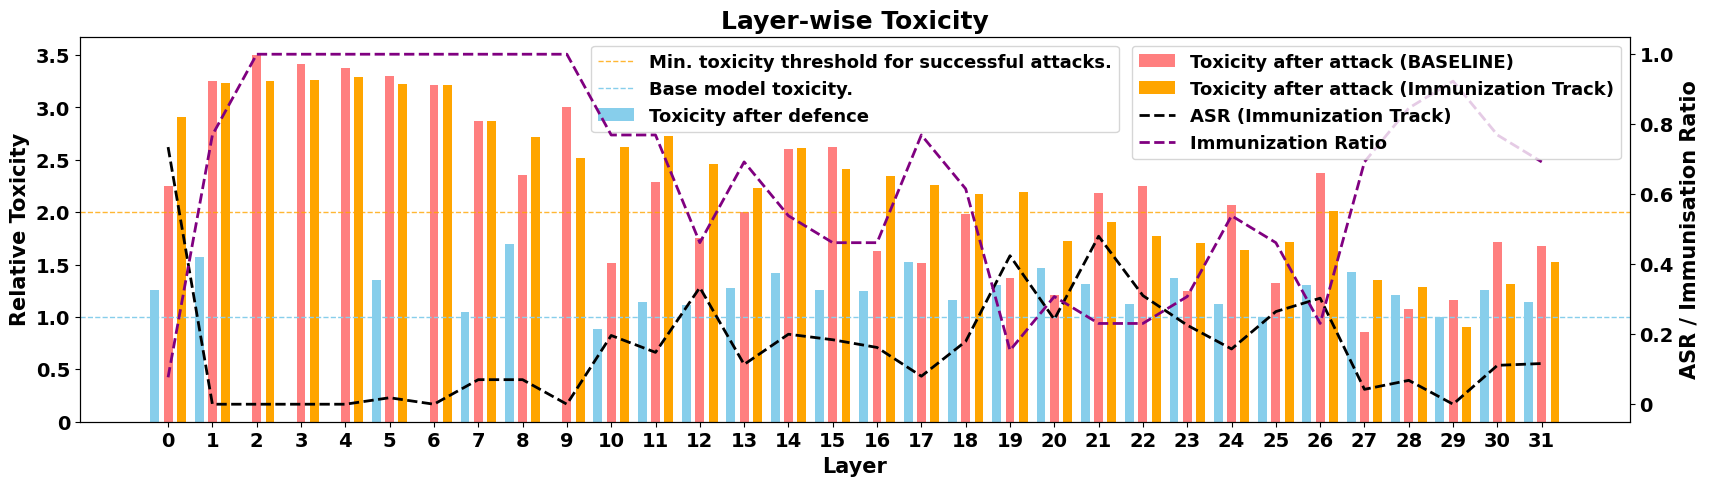

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))

# Minimum toxicity for valid attacks:
ax.axhline(y=min_attack_toxicity_treshold,
            color='orange',
            alpha=0.8,
            linestyle='dashed',
            linewidth=1.0,
            label='Min. toxicity threshold for successful attacks.')

# Reference minimum toxicity for valid attacks:
ax.axhline(y=1,
            color='skyblue',
            alpha=1,
            linestyle='dashed',
            linewidth=1.0,
            label='Base model toxicity.')

# Bar plot stuff:
width = 0.2  # Width of each bar

# Mean performance after defence:
ax.bar(
    x=grouped_defence_toxicity.index - ((3*width)/2),
    height=grouped_defence_toxicity['defence toxicity'],
    width=width,
    linestyle='-',
    lw=2,
    color='skyblue',
    alpha=1,
    label='Toxicity after defence')


# Mean performance after attacks: (Baseline track)
ax.bar(
    x=baseline_ds.index,
    height=baseline_ds['mean attack toxicity'],
    width=width,
    linestyle='-',
    lw=2,
    color='red',
    alpha=0.5,
    label='Toxicity after attack (BASELINE)')

# Mean performance after attacks: (Baseline track)
ax.bar(
    x=grouped_attack_toxicity_ds.index + ((3*width)/2),
    height=grouped_attack_toxicity_ds['attack toxicity'],
    width=width,
    linestyle='-',
    lw=2,
    color='orange',
    alpha=1,
    label='Toxicity after attack (Immunization Track)')

"""
absortion_points = grouped_defence_performance.loc[grouped_defence_performance['Defence success ratio'] > 0]
# Absortion points:
for idx, layer in enumerate(
        absortion_points.index):
    absortion_ratio = absortion_points['Defence success ratio'].loc[layer]
    ax.plot(
            layer,
            absortion_points['Mean performance after defence'].loc[layer],
            marker='*',
            markersize= math.sqrt(absortion_points['Defence success ratio'].loc[layer])*60,
            color='blue',
            alpha=1,
            label=('Absortion points' if idx == len(absortion_points.index)//2 else None))
"""

# Customize ticks
ax.set_xticks(ticks=grouped_attack_toxicity_ds.index, labels=list(range(32)), fontsize=14, fontweight='bold')
ax.set_yticks(
    ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5],
    labels=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5],
    fontsize=14,
    fontweight='bold')

ax.set_xlabel('Layer', fontdict=axis_font_dict)
ax.set_ylabel('Relative Toxicity', fontdict=axis_font_dict)


# Create secondary y-axis
ax2 = ax.twinx()
# which is for the ASR
ax2.plot(grouped_attack_toxicity_ds['successful'], linestyle='--', lw=2, color='black', label='ASR (Immunization Track)')
ax2.plot(grouped_defence_performance['Immunization ratio'], linestyle='--', lw=2, color='purple', label='Immunization Ratio')

# ax2.plot(baseline_ds['ASR'], linestyle='--', lw=2, color='gray', label='ASR (Baseline)')


# Customize ticks for the secondary y-axis
ax2.set_yticks(ticks=[0,0.2,0.4,0.6,0.8,1.0], labels=[0,0.2,0.4,0.6,0.8,1.0], fontsize=14, fontweight='bold', color='black')

# Label for the secondary y-axis
ax2.set_ylabel('ASR / Immunisation Ratio', color='black', fontdict=axis_font_dict)

# Combine legends from both axes
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()


ax.legend(lines1[:3],
           labels1[:3],
           prop=legend_font_dict,
           loc='upper center')

ax2.legend(lines1[3:] + lines2,
           labels1[3:] + labels2,
           prop=legend_font_dict,
           loc='upper right')

plt.title(f'Layer-wise Toxicity', fontdict=title_font_dict)

plt.show()

# ASR:

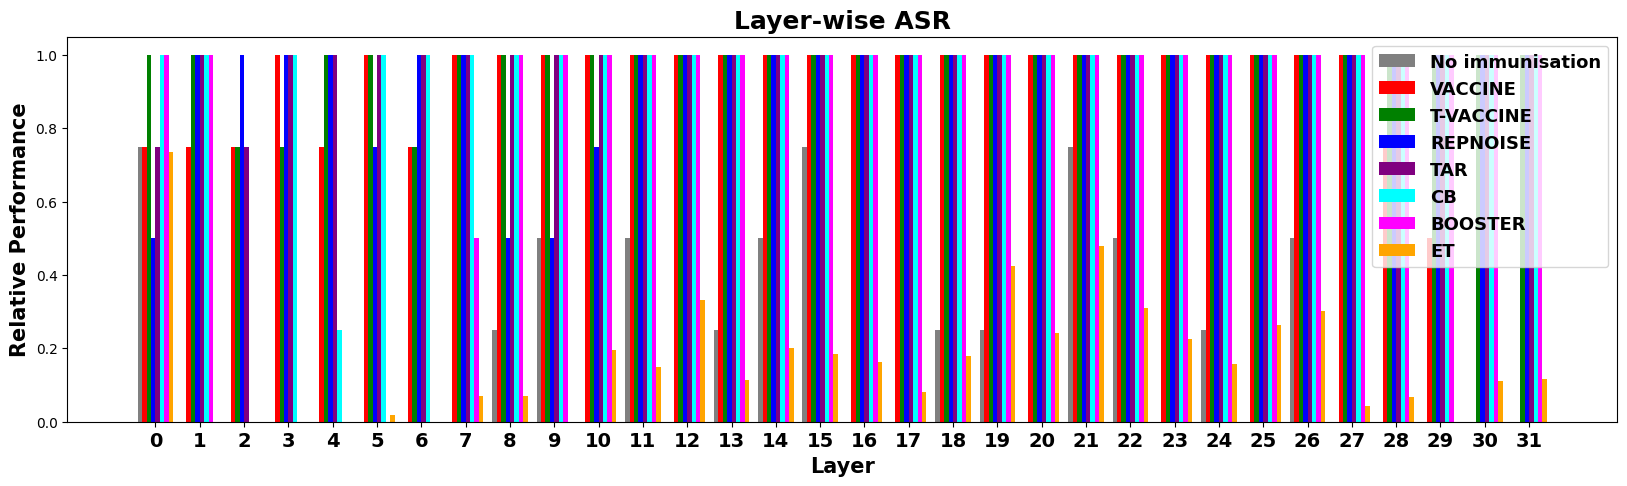

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))


# Define bar width and offsets
width = 0.1
offsets = np.arange(-3.5*width, 4*width, width)  # Creates 8 evenly spaced positions


ax.bar(
    x=instruct_ds['layer'] + offsets[0],
    height=instruct_ds['ASR'],
    width=width,
    color='gray',
    alpha=1,
    label='No immunisation')


for i, (candidate_name, candidate_df) in enumerate(baselines_dfs.items(), start=1):


  # Mean performance after attacks: (Baseline track)
  ax.bar(
      x=candidate_df['layer'] + offsets[i],
      height=candidate_df['ASR'],
      width=width,
      color=color_dict[candidate_name],
      alpha=1,
      label=candidate_name)

# Mean performance after attacks: (Baseline track)
ax.bar(
    x=grouped_attack_toxicity_ds.reset_index()['layer'] + offsets[-1],
    height=grouped_attack_toxicity_ds.reset_index()['ASR'],
    width=width,
    color='orange',
    alpha=1,
    label='ET')


# Customize ticks
ax.set_xticks(ticks=grouped_defence_performance.index, labels=list(range(32)), fontsize=14, fontweight='bold')

ax.set_xlabel('Layer', fontdict=axis_font_dict)
ax.set_ylabel('Relative Performance', fontdict=axis_font_dict)


# Combine legends from both axes
lines1, labels1 = ax.get_legend_handles_labels()

ax.legend(lines1,labels1,
          prop=legend_font_dict)


plt.title(f'Layer-wise ASR', fontdict=title_font_dict)

plt.show()

<ipython-input-109-3abf27b127d2>:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks().round(2), fontdict={'fontsize': 12, 'fontweight': 'bold'})


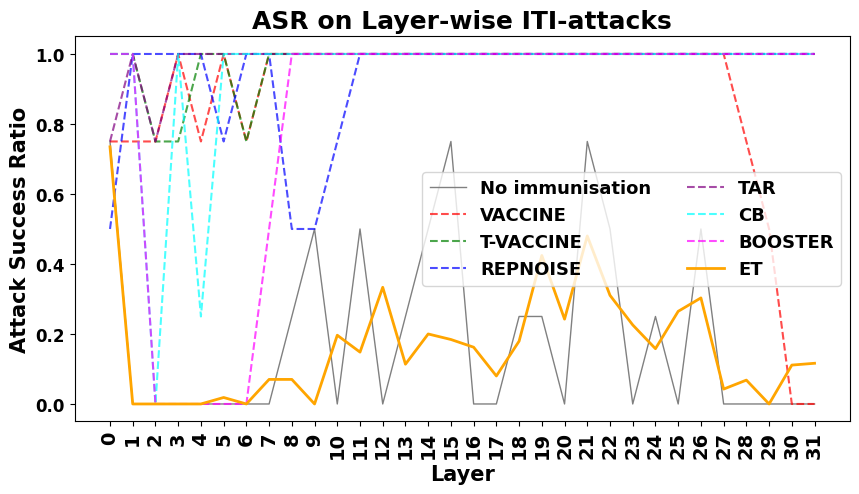

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))


ax.plot(
    instruct_ds['layer'],
    instruct_ds['ASR'],
    linestyle='-',
    linewidth=1,
    color='gray',
    alpha=1,
    label='No immunisation')


for i, (candidate_name, candidate_df) in enumerate(baselines_dfs.items(), start=1):


  # Mean performance after attacks: (Baseline track)
  ax.plot(
      candidate_df['layer'],
      candidate_df['ASR'],
      linestyle='--',
      linewidth=1.5,
      color=color_dict[candidate_name],
      alpha=0.7,
      label=candidate_name)

# Mean performance after attacks: (Baseline track)
ax.plot(
    grouped_attack_toxicity_ds.reset_index()['layer'],
    grouped_attack_toxicity_ds.reset_index()['ASR'],
    linestyle='-',
    color='orange',
    alpha=1,
    linewidth=2,
    label='ET')


# Customize ticks
ax.set_xticks(ticks=grouped_defence_performance.index, labels=list(range(32)), fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
ax.set_xlabel('Layer', fontdict=axis_font_dict)
ax.set_ylabel('Attack Success Ratio', fontdict=axis_font_dict)
ax.set_yticklabels(ax.get_yticks().round(2), fontdict={'fontsize': 12, 'fontweight': 'bold'})


# Combine legends from both axes
lines1, labels1 = ax.get_legend_handles_labels()

ax.legend(lines1,labels1,
          prop=legend_font_dict,
          ncols=2)


plt.title(f'ASR on Layer-wise ITI-attacks', fontdict=title_font_dict)

plt.show()

# second plot selective:

In [ ]:
# formatting stuff:
title_font_dict = {'weight': 'bold', 'size': 18}
axis_font_dict = {'weight': 'bold', 'size': 15}
legend_font_dict = {'weight': 'bold', 'size': 13}

# constants:
min_attack_toxicity_treshold = 2.0
init_toxicity = 0.28
max_toxicity_treshold = 0.2 + (0.8 * init_toxicity)

# read and clean data:
omni = pd.read_csv('results/toxicity_results.csv')
columns_to_drop = [col for col in omni.columns if col.endswith('MIN') \
                       or col.endswith('MAX') \
                       or col.endswith('step')]
omni.drop(columns=columns_to_drop, inplace=True)
omni.set_index('STEP', inplace=True)


# prepare baseline data:
baseline_seed = 2
columns_to_drop = [col for col in omni.columns if not f'BASELINE_{baseline_seed}' in col]
baseline_ds = omni.drop(columns = columns_to_drop)
baseline_ds.drop(0, inplace = True)  # First record is related to initialization value retrieval
baseline_ds[f'BASELINE_{baseline_seed} - IMMUNIZING_LAYER'].ffill(inplace=True)
baseline_ds = baseline_ds.drop(columns = [f'BASELINE_{baseline_seed} - Succesfully immunized layers',
                                          f'BASELINE_{baseline_seed} - Unsuccesfully immunized layers'])
baseline_ds = baseline_ds[baseline_ds[f'BASELINE_{baseline_seed} - Toxicity after attacks'].notna()].copy()
baseline_ds[f'BASELINE_{baseline_seed} - Toxicity after succesful attacks'] = \
    baseline_ds[f'BASELINE_{baseline_seed} - Toxicity after succesful attacks'].isna().map({True:0,False:1})

baseline_ds.columns = ['layer', 'attack toxicity', 'successful attack']
baseline_ds = baseline_ds.groupby('layer').agg({
    'attack toxicity': 'mean',
    'successful attack': 'mean'}).reset_index()
baseline_ds.columns = ['layer', 'mean attack toxicity', 'ASR']
# baseline_ds.fillna(min_attack_toxicity_treshold, inplace=True)

In [ ]:
# all runs
run_names = list(set([col.split(' -')[0] for col in omni.columns if 'VACCINE' in col]))
run_dss = []
for run_to_analyze in run_names:

    if 'sl' not in run_to_analyze:
        continue

    columns_to_drop = [col for col in omni.columns if not col.split(' -')[0] == run_to_analyze]
    run_ds = omni.drop(columns=columns_to_drop)
    run_ds['action'] = run_ds[run_to_analyze + ' - Toxicity after attacks'].notna().map({True: 'Attack', False: 'Defence'})
    run_ds['successful'] = float('nan')
    if run_to_analyze + ' - Toxicity after succesful attacks' in run_ds.columns and \
            run_to_analyze + ' - Toxicity after succesful defences' in run_ds.columns:
        run_ds['successful'] = (run_ds[run_to_analyze + ' - Toxicity after succesful attacks'].notna() \
             | run_ds[run_to_analyze + ' - Toxicity after succesful defences'].notna())

    run_ds['absortion'] = float('nan')
    if run_to_analyze + ' - Absorbed defences at layer' in run_ds.columns:
        run_ds['absortion'] = run_ds[run_to_analyze + ' - Absorbed defences at layer'].notna()
    columns_to_drop = [col for col in run_ds.columns if 'after succesful' in col or 'Absorbed' in col]
    run_ds = run_ds.drop(columns=columns_to_drop)

    run_ds['layer'] = run_ds[run_to_analyze + ' - IMMUNIZING_LAYER']
    run_ds.drop(columns=[run_to_analyze + ' - IMMUNIZING_LAYER'], inplace=True)

    if run_to_analyze + ' - Toxicity after attacks' in run_ds.columns:
        run_ds['attack toxicity'] = run_ds[run_to_analyze + ' - Toxicity after attacks']
        run_ds.drop(columns=[run_to_analyze + ' - Toxicity after attacks'], inplace=True)

    if run_to_analyze + ' - Performance after defences' in run_ds.columns:
        run_ds['defence toxicity'] = run_ds[run_to_analyze + ' - Toxicity after defences']
        run_ds.drop(columns=[run_to_analyze + ' - Toxicity after defences'], inplace=True)
    else: run_ds['defence toxicity'] = float('nan')

    if run_to_analyze + ' - Succesfully immunized layers' in run_ds.columns:
        run_ds['immunized'] = run_ds[run_to_analyze + ' - Succesfully immunized layers']
        run_ds.drop(columns=[run_to_analyze + ' - Succesfully immunized layers'], inplace=True)
    else: run_ds['immunized'] = float('nan')

    if run_to_analyze + ' - Unsuccesfully immunized layers' in run_ds.columns:
        run_ds['not immunized'] = run_ds[run_to_analyze + ' - Unsuccesfully immunized layers']
        run_ds.drop(columns=[run_to_analyze + ' - Unsuccesfully immunized layers'], inplace=True)
    else: run_ds['not immunized'] = float('nan')


    # strategies for aggregation
    run_ds['successful'] = run_ds['successful'].notna().map({True: 1, False: 0})
    run_ds['absortion'] = run_ds['absortion'].notna().map({True: 1, False: 0})
    run_ds.drop(columns=['not immunized'], inplace=True)
    run_ds['layer'].ffill(inplace=True)
    run_ds['immunized'] = run_ds['immunized'].notna().map({True : 1, False:0 })
    run_dss.append(run_ds)

# all runs dataframe:
total_ds = pd.concat(run_dss)

In [ ]:
# all defences dataframe:
defence_ds = total_ds.loc[(total_ds['action']=='Defence') | total_ds['immunized'] == 1].copy().drop(columns=[
    'attack toxicity',
    'action'])

defence_ds = defence_ds[defence_ds['layer'].notna()].copy()  # the first record is associated with init value retrieval... it is not a defence really...
defence_toxicity_ds = defence_ds[['layer','defence toxicity', 'absortion', 'immunized']]

# extract values for plotting:
grouped_defence_toxicity_sel = defence_toxicity_ds.groupby('layer').agg({
    'defence toxicity': 'mean'})

# all attacks dataframe:
attack_toxicity_ds = total_ds.loc[(total_ds['action']=='Attack')][['layer', 'attack toxicity', 'successful']]
grouped_attack_toxicity_ds = attack_toxicity_ds.groupby('layer').mean()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))

# Minimum toxicity for valid attacks:
ax.axhline(y=min_attack_toxicity_treshold,
            color='orange',
            alpha=0.8,
            linestyle='dashed',
            linewidth=1.0,
            label='Min. toxicity threshold for successful attacks.')

# Reference minimum toxicity for valid attacks:
ax.axhline(y=1,
            color='skyblue',
            alpha=1,
            linestyle='dashed',
            linewidth=1.0,
            label='Base model toxicity.')

# Bar plot stuff:
width = 0.2  # Width of each bar

# Mean performance after defence:
ax.bar(
    x=grouped_defence_toxicity.index - ((3*width)/2),
    height=grouped_defence_toxicity['defence toxicity'],
    width=width,
    linestyle='-',
    lw=2,
    color='skyblue',
    alpha=1,
    label='Toxicity after defence')


# Mean performance after attacks: (Baseline track)
ax.bar(
    x=baseline_ds.index,
    height=baseline_ds['mean attack toxicity'],
    width=width,
    linestyle='-',
    lw=2,
    color='red',
    alpha=0.5,
    label='Toxicity after attack (BASELINE)')

# Mean performance after attacks: (Baseline track)
ax.bar(
    x=grouped_attack_toxicity_ds.index + ((3*width)/2),
    height=grouped_attack_toxicity_ds['attack toxicity'],
    width=width,
    linestyle='-',
    lw=2,
    color='orange',
    alpha=1,
    label='Toxicity after attack (Immunization Track)')



# Customize ticks
ax.set_xticks(ticks=grouped_attack_toxicity_ds.index, labels=list(range(1,32)), fontsize=14, fontweight='bold')
ax.set_yticks(
    ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5],
    labels=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5],
    fontsize=14,
    fontweight='bold')

ax.set_xlabel('Layer', fontdict=axis_font_dict)
ax.set_ylabel('Relative Toxicity', fontdict=axis_font_dict)


# Create secondary y-axis
ax2 = ax.twinx()
# which is for the ASR
ax2.plot(grouped_defence_performance_sel['Immunization ratio'], linestyle='--', lw=2, color='red', label='Immunization Ratio without defence at layer 0')
ax2.plot(grouped_defence_performance['Immunization ratio'], linestyle='--', lw=2, color='purple', label='Immunization Ratio with defence at layer 0')

# ax2.plot(baseline_ds['ASR'], linestyle='--', lw=2, color='gray', label='ASR (Baseline)')


# Customize ticks for the secondary y-axis
ax2.set_yticks(ticks=[0,0.2,0.4,0.6,0.8,1.0], labels=[0,0.2,0.4,0.6,0.8,1.0], fontsize=14, fontweight='bold', color='black')

# Label for the secondary y-axis
ax2.set_ylabel('Immunisation Ratio', color='black', fontdict=axis_font_dict)

# Combine legends from both axes
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()


ax.legend(lines1[:3],
           labels1[:3],
           prop=legend_font_dict,
           loc='upper center')

ax2.legend(lines1[3:] + lines2,
           labels1[3:] + labels2,
           prop=legend_font_dict,
           loc='upper right')

plt.title(f'Layer-wise Toxicity', fontdict=title_font_dict)

plt.show()

# Third plot:

In [ ]:
import wandb

api = wandb.Api()
runs = api.runs("low_cost_toxification")  # Replace with your entity and project name

In [ ]:
all_test_runs = {}
runs_with_1_vaccine = {}
runs_with_2_vaccines = {}
runs_with_3_or_more_vaccines = {}
super_vw_runs = {}
ml_vw_runs = {}
gu_runs = {}
super_runs = {}

for run in runs:

    if 'TESTING' in run.name and not 'GU' in run.name:

        if run.name not in ['TESTING34','TESTING33','TESTING35','TESTING_compound_reg05']:
            config = run.config
            vaccine_list = config["mount_vaccines"].split(':')
            all_test_runs[run.name] = vaccine_list

            if 'GU' in run.name:
                gu_runs[run.name] = vaccine_list
            if len(vaccine_list) == 1:
                runs_with_1_vaccine[run.name] = vaccine_list
            if len(vaccine_list) == 2:
                runs_with_2_vaccines[run.name]  = vaccine_list
            if len(vaccine_list) > 2:
                runs_with_3_or_more_vaccines[run.name]  = vaccine_list
            if 'super_vw' in run.name:
                super_vw_runs[run.name] = vaccine_list
            if 'ml_vw' in run.name:
                ml_vw_runs[run.name] = vaccine_list
            if 'SUPER' in run.name and not 'vw' in run.name:
                super_runs[run.name] = vaccine_list
            else:
                continue
        else:
            continue

In [ ]:
# formatting stuff:
title_font_dict = {'weight': 'bold', 'size': 18}
axis_font_dict = {'weight': 'bold', 'size': 15}
legend_font_dict = {'weight': 'bold', 'size': 14}

# constants:
min_relative_attack_perf = 0.5

# read and clean data:
omni = pd.read_csv('results/final_test.csv')

columns_to_drop = [col for col in omni.columns if col.endswith('MIN') \
                       or col.endswith('MAX') \
                       or col.endswith('step')]
omni.drop(columns=columns_to_drop, inplace=True)
omni.set_index('STEP', inplace=True)

# prepare basline data:
baseline_seed = 2
columns_to_drop = [col for col in omni.columns if not f'BASELINE_{baseline_seed}' in col]
baseline_ds = omni.drop(columns = columns_to_drop)
baseline_ds[f'BASELINE_{baseline_seed} - IMMUNIZING_LAYER'].ffill(inplace=True)
baseline_ds = baseline_ds[
    (baseline_ds[f'BASELINE_{baseline_seed} - Performance after attacks'].notna()) | \
    (baseline_ds[f'BASELINE_{baseline_seed} - Toxicity after attacks'].notna())].copy()
baseline_ds = baseline_ds.drop(columns = [f'BASELINE_{baseline_seed} - Performance after succesful attacks'])
baseline_ds.columns = ['layer', 'attack performance', 'attack toxicity', 'sucessful attacks']
baseline_ds['sucessful attacks'] = baseline_ds['sucessful attacks'].notna().map({True : 1, False: 0})
baseline_ds = baseline_ds.groupby('layer').agg({
    'attack performance': 'mean',
    'attack toxicity': 'mean',
    'sucessful attacks': 'mean'
})
baseline_ds.columns = ['mean attack performance', 'mean attack toxicity', 'ASR']

In [ ]:
def get_total_ds(run_names):
    run_dss = []
    for run_to_analyze in run_names:

        columns_to_drop = [col for col in omni.columns if not col.split(' -')[0] == run_to_analyze]
        run_ds = omni.drop(columns=columns_to_drop)
        run_ds[f'{run_to_analyze} - IMMUNIZING_LAYER'].ffill(inplace=True)
        run_ds = run_ds[
            (run_ds[f'{run_to_analyze} - Performance after attacks'].notna()) | \
            (run_ds[f'{run_to_analyze} - Toxicity after attacks'].notna())].copy()
        run_ds = run_ds.drop(columns = [f'{run_to_analyze} - Performance after succesful attacks'])
        run_ds.columns = ['layer', 'attack performance', 'attack toxicity', 'sucessful attacks']
        run_ds['sucessful attacks'] = run_ds['sucessful attacks'].notna().map({True : 1, False: 0})
        run_ds = run_ds.groupby('layer').agg({
            'attack performance': 'mean',
            'attack toxicity': 'mean',
            'sucessful attacks': 'mean'
        })
        run_ds.columns = ['mean attack performance', 'mean attack toxicity', 'ASR']
        run_dss.append(run_ds)

    # total runs
    total_ds =  pd.concat(run_dss)

    total_ds = total_ds.reset_index().groupby('layer').agg({
        'mean attack performance': 'mean',
        'mean attack toxicity': 'mean',
        'ASR': 'mean'
    })

    # toxicity_drop = baseline_ds['mean attack toxicity']*baseline_ds['ASR'] - total_ds['mean attack toxicity']*total_ds['ASR']
    toxicity_drop = (baseline_ds['mean attack toxicity'] - total_ds['mean attack toxicity'])

    performance_drop = baseline_ds['mean attack performance'] - total_ds['mean attack performance']

    return total_ds, toxicity_drop, performance_drop

In [ ]:
all_total_ds, all_toxicity_drop, all_performance_drop = get_total_ds(all_test_runs)
one_vaccine_total_ds, one_toxicity_drop, one_performance_drop = get_total_ds(runs_with_1_vaccine)
two_vaccines_total_ds, two_toxicity_drop, two_performance_drop = get_total_ds(runs_with_2_vaccines)
many_vaccines_total_ds, many_toxicity_drop, many_performance_drop = get_total_ds(runs_with_3_or_more_vaccines)
# gu_vaccines_total_ds, gu_toxicity_drop = get_total_ds(gu_runs)

In [ ]:
runs_with_init_vaccine = runs_with_1_vaccine.copy()
del runs_with_init_vaccine['TESTING_12']
del runs_with_init_vaccine['TESTING_5']
orig_total_ds, orig_toxicity_drop, orig_performance_drop = get_total_ds(runs_with_init_vaccine)

In [ ]:
super_vw_runs

In [ ]:
super_total_ds, super_toxicity_drop, super_performance_drop = get_total_ds(super_runs)

super_vw_total_ds, super_vw_toxicity_drop, super_vw_performance_drop = get_total_ds(super_vw_runs)
super_vw_runs08 = super_vw_runs.copy()
super_vw_runs05 = super_vw_runs.copy()
super_vw_runs09 = super_vw_runs.copy()

del super_vw_runs05['TESTING28_super_vw_0.8']
del super_vw_runs05['TESTING31_super_vw_0.9']

del super_vw_runs08['TESTING27_super_vw_0.5']
del super_vw_runs08['TESTING31_super_vw_0.9']

del super_vw_runs09['TESTING27_super_vw_0.5']
del super_vw_runs09['TESTING28_super_vw_0.8']

super_vw_total_ds09, super_vw_toxicity_drop09, super_vw_performance_drop09 = get_total_ds(super_vw_runs09)
super_vw_total_ds08, super_vw_toxicity_drop08, super_vw_performance_drop08 = get_total_ds(super_vw_runs08)
super_vw_total_ds05, super_vw_toxicity_drop05, super_vw_performance_drop05 = get_total_ds(super_vw_runs05)

In [ ]:
ml_vw_total_ds, ml_vw_toxicity_drop, ml_vw_performance_drop = get_total_ds(ml_vw_runs)

ml_vw_runs_05 = ml_vw_runs.copy()
ml_vw_runs_08 = ml_vw_runs.copy()
ml_vw_runs_09 = ml_vw_runs.copy()

del ml_vw_runs_05['TESTING30_ml_vw_0.8']
del ml_vw_runs_05['TESTING32_ml_vw_0.9']

del ml_vw_runs_08['TESTING29_ml_vw_0.5']
del ml_vw_runs_08['TESTING32_ml_vw_0.9']

del ml_vw_runs_09['TESTING29_ml_vw_0.5']
del ml_vw_runs_09['TESTING30_ml_vw_0.8']

ml_vw_total_ds05, ml_vw_toxicity_drop05, ml_vw_performance_drop05 = get_total_ds(ml_vw_runs_05)
ml_vw_total_ds08, ml_vw_toxicity_drop08, ml_vw_performance_drop08 = get_total_ds(ml_vw_runs_08)
ml_vw_total_ds09, ml_vw_toxicity_drop09, ml_vw_performance_drop09 = get_total_ds(ml_vw_runs_09)

In [ ]:
def super_plot(total_ds, toxicity_drop, performance_drop, refstring):

    fig, ax = plt.subplots(figsize=(20, 5))

    # Bar plot stuff:
    width = 0.35  # Width of each bar

    # Baseline ASR
    ax.bar(
        x=baseline_ds.index - ((width)/2),
        height=baseline_ds['ASR'],
        width=width,
        linestyle='-',
        lw=2,
        color='red',
        alpha=1,
        label='Baseline ASR')


    # Mean performance after attacks: (Baseline track)
    ax.bar(
        x=total_ds.index + ((width)/2),
        height=total_ds['ASR'],
        width=width,
        linestyle='-',
        lw=2,
        color='skyblue',
        alpha=0.5,
        label='Immunized models ASR')



    # Customize ticks
    ax.set_xticks(
        ticks=baseline_ds.index,
        labels=list(range(32)),
        fontsize=14,
        fontweight='bold')

    ax.set_yticks(
        ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
        labels=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
        fontsize=14,
        fontweight='bold')

    ax.set_xlabel('Layer', fontdict=axis_font_dict)
    ax.set_ylabel('Attack Success Ratio', fontdict=axis_font_dict)


    # Create secondary y-axis
    ax2 = ax.twinx()
    # which is for the ASR
    ax2.plot(toxicity_drop,  linestyle='--', lw=2, color='purple', label='Mean after-attack toxicity drop')
    #ax2.plot(performance_drop, linestyle='-.', lw=2, color='blue', label='Mean after-attack performance drop')

    # Customize ticks for the secondary y-axis
    ax2.set_yticks(ticks=[-0.6, -0.3, 0.0, 0.3, 0.6, 0.9],
                   labels=[-0.6, -0.3, 0.0, 0.3, 0.6, 0.9],
                   fontsize=14, fontweight='bold', color='purple')

    # Reference toxicity line:
    ax2.axhline(y=0,
                color='purple',
                alpha=0.6,
                linestyle='dashed',
                linewidth=1,
                label='Base model toxicity')

    # Label for the secondary y-axis
    ax2.set_ylabel('After Attack Toxicity Drop', color='purple', fontdict=axis_font_dict)




    # Combine legends from both axes
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()

    ax2.legend(lines1 + lines2,
               labels1 + labels2,
               prop=legend_font_dict,
               loc='upper right')

    plt.title(f'Immunisation against layer-wise ITI-interventions', fontdict=title_font_dict)

    print(refstring)
    plt.show()

In [ ]:
super_plot(super_total_ds, super_toxicity_drop, super_performance_drop, 'Super test')
super_plot(super_vw_total_ds, super_vw_toxicity_drop, super_vw_performance_drop, 'Super VW test')
super_plot(super_vw_total_ds09, super_vw_toxicity_drop09, super_vw_performance_drop09, 'Super09 VW test')
super_plot(super_vw_total_ds08, super_vw_toxicity_drop08, super_vw_performance_drop08, 'Super08 VW test')
super_plot(super_vw_total_ds05, super_vw_toxicity_drop05, super_vw_performance_drop05, 'Super05 VW test')

In [ ]:
super_plot(ml_vw_total_ds, ml_vw_toxicity_drop, ml_vw_performance_drop, 'ML VW test')
super_plot(ml_vw_total_ds05, ml_vw_toxicity_drop05, ml_vw_performance_drop05, 'ML VW test05')
super_plot(ml_vw_total_ds08, ml_vw_toxicity_drop08, ml_vw_performance_drop08, 'ML VW test08')
super_plot(ml_vw_total_ds09, ml_vw_toxicity_drop09, ml_vw_performance_drop09, 'ML VW test09')

In [ ]:
super_plot(all_total_ds, all_toxicity_drop, all_performance_drop, 'All test')
super_plot(orig_total_ds, orig_toxicity_drop, orig_performance_drop, 'Orig test')

super_plot(one_vaccine_total_ds, one_toxicity_drop,one_performance_drop, 'One vaccine')
super_plot(two_vaccines_total_ds, two_toxicity_drop,two_performance_drop, 'Two vaccines')
super_plot(many_vaccines_total_ds, many_toxicity_drop, many_performance_drop, 'Three or more vaccines')

# Downloading tables:

In [ ]:
import wandb

api = wandb.Api()
all_runs = api.runs("low_cost_toxification")  # Replace with your entity and project name

In [ ]:
for run in all_runs:
    if run.name == "VACCINE_FOREVER_equity":
        break
    else:
        pass

In [ ]:
for file in run.files():
    print(file.name)

In [ ]:
table_file_name = "media/table/After Successful Attack Behaviour. Layer: 8 Step: 54_382_f8980e5a5d06cf5f6f4d.table.json"

# Download the table file
table_file = run.file(table_file_name).download()

print(f"Table downloaded to {table_file.name}")